# 1. Import the necessary libraries

In [5]:
import string
import pandas as pd
import numpy as np
import re
import requests
import io as StringIO
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.decomposition import TruncatedSVD
from sklearn import metrics
from joblib import parallel_backend

# 2. Define filepaths

In [6]:
file_paths = {
    "English": "dataset/europarl-v7.bg-en.en",
    "Bulgarian": "dataset/europarl-v7.bg-en.bg",
    "Czech": "dataset/europarl-v7.cs-en.cs",
    "Danish": "dataset/europarl-v7.da-en.da",
    "German": "dataset/europarl-v7.de-en.de",
    "Spanish": "dataset/europarl-v7.es-en.es",
    "Finnish": "dataset/europarl-v7.fi-en.fi",
    "French": "dataset/europarl-v7.fr-en.fr",
    "Hungarian": "dataset/europarl-v7.hu-en.hu",
    "Italian": "dataset/europarl-v7.it-en.it",
    "Latvian": "dataset/europarl-v7.lv-en.lv",
    "Dutch": "dataset/europarl-v7.nl-en.nl",
    "Polish": "dataset/europarl-v7.pl-en.pl",
    "Portugese": "dataset/europarl-v7.pt-en.pt",
    "Romanian": "dataset/europarl-v7.ro-en.ro",
    "Slovenian": "dataset/europarl-v7.sl-en.sl",
    "Swedish": "dataset/europarl-v7.sv-en.sv",
}

In [7]:
# Define the punctuation translation table
translate_table = str.maketrans('', '', string.punctuation)
for char in string.punctuation:
    print(char, end = " ")

! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ 

# 3. Preproceesing Functions

* Here we have batch processing function where we pass each line from each chunk for text preprocessing to the preprocess_text function.
* The function returns the cleaned line which process_chunk process appends to data and returns it

In [8]:
# Function to process each chunk and return the processed data
def process_chunk(chunk, language, translate_table):
    data = []
    for line in chunk:
        cleaned_line = preprocess_text(line.strip(), translate_table)
        if cleaned_line:
            data.append((cleaned_line, language))
    return data

# Function to preprocess text data
def preprocess_text(line, translate_table):
    if len(line) != 0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
    return line

In [9]:
# Initialize lists to store the final data
final_data = []

# 4. Batch Preprocessing

We process data in batches from each of the defines filepaths. And add the processed data to final_data list.

In [10]:
# Process each file
chunksize = 10000  # Adjust the chunk size as needed
for language, file_path in file_paths.items():
    print(f"Processing {language}...")
    for chunk in pd.read_csv(file_path,"utf-8", header=None, names=["Text"], chunksize=chunksize, engine='python'):
        processed_chunk = process_chunk(chunk["Text"], language, translate_table)
        final_data.extend(processed_chunk)

Processing English...


/var/folders/hv/x9fmbc954rz2wwmtgt0nn9f40000gn/T/ipykernel_9767/529781391.py:5: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  for chunk in pd.read_csv(file_path,"utf-8", header=None, names=["Text"], chunksize=chunksize, engine='python'):


Processing Bulgarian...


/var/folders/hv/x9fmbc954rz2wwmtgt0nn9f40000gn/T/ipykernel_9767/529781391.py:5: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  for chunk in pd.read_csv(file_path,"utf-8", header=None, names=["Text"], chunksize=chunksize, engine='python'):


Processing Czech...


/var/folders/hv/x9fmbc954rz2wwmtgt0nn9f40000gn/T/ipykernel_9767/529781391.py:5: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  for chunk in pd.read_csv(file_path,"utf-8", header=None, names=["Text"], chunksize=chunksize, engine='python'):


Processing Danish...


/var/folders/hv/x9fmbc954rz2wwmtgt0nn9f40000gn/T/ipykernel_9767/529781391.py:5: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  for chunk in pd.read_csv(file_path,"utf-8", header=None, names=["Text"], chunksize=chunksize, engine='python'):


Processing German...


/var/folders/hv/x9fmbc954rz2wwmtgt0nn9f40000gn/T/ipykernel_9767/529781391.py:5: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  for chunk in pd.read_csv(file_path,"utf-8", header=None, names=["Text"], chunksize=chunksize, engine='python'):


Processing Spanish...


/var/folders/hv/x9fmbc954rz2wwmtgt0nn9f40000gn/T/ipykernel_9767/529781391.py:5: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  for chunk in pd.read_csv(file_path,"utf-8", header=None, names=["Text"], chunksize=chunksize, engine='python'):


Processing Finnish...


/var/folders/hv/x9fmbc954rz2wwmtgt0nn9f40000gn/T/ipykernel_9767/529781391.py:5: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  for chunk in pd.read_csv(file_path,"utf-8", header=None, names=["Text"], chunksize=chunksize, engine='python'):


Processing French...


/var/folders/hv/x9fmbc954rz2wwmtgt0nn9f40000gn/T/ipykernel_9767/529781391.py:5: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  for chunk in pd.read_csv(file_path,"utf-8", header=None, names=["Text"], chunksize=chunksize, engine='python'):


Processing Hungarian...


/var/folders/hv/x9fmbc954rz2wwmtgt0nn9f40000gn/T/ipykernel_9767/529781391.py:5: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  for chunk in pd.read_csv(file_path,"utf-8", header=None, names=["Text"], chunksize=chunksize, engine='python'):


Processing Italian...


/var/folders/hv/x9fmbc954rz2wwmtgt0nn9f40000gn/T/ipykernel_9767/529781391.py:5: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  for chunk in pd.read_csv(file_path,"utf-8", header=None, names=["Text"], chunksize=chunksize, engine='python'):


Processing Latvian...


/var/folders/hv/x9fmbc954rz2wwmtgt0nn9f40000gn/T/ipykernel_9767/529781391.py:5: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  for chunk in pd.read_csv(file_path,"utf-8", header=None, names=["Text"], chunksize=chunksize, engine='python'):


Processing Dutch...


/var/folders/hv/x9fmbc954rz2wwmtgt0nn9f40000gn/T/ipykernel_9767/529781391.py:5: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  for chunk in pd.read_csv(file_path,"utf-8", header=None, names=["Text"], chunksize=chunksize, engine='python'):


Processing Polish...


/var/folders/hv/x9fmbc954rz2wwmtgt0nn9f40000gn/T/ipykernel_9767/529781391.py:5: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  for chunk in pd.read_csv(file_path,"utf-8", header=None, names=["Text"], chunksize=chunksize, engine='python'):


Processing Portugese...


/var/folders/hv/x9fmbc954rz2wwmtgt0nn9f40000gn/T/ipykernel_9767/529781391.py:5: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  for chunk in pd.read_csv(file_path,"utf-8", header=None, names=["Text"], chunksize=chunksize, engine='python'):


Processing Romanian...


/var/folders/hv/x9fmbc954rz2wwmtgt0nn9f40000gn/T/ipykernel_9767/529781391.py:5: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  for chunk in pd.read_csv(file_path,"utf-8", header=None, names=["Text"], chunksize=chunksize, engine='python'):


Processing Slovenian...


/var/folders/hv/x9fmbc954rz2wwmtgt0nn9f40000gn/T/ipykernel_9767/529781391.py:5: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  for chunk in pd.read_csv(file_path,"utf-8", header=None, names=["Text"], chunksize=chunksize, engine='python'):


Processing Swedish...


/var/folders/hv/x9fmbc954rz2wwmtgt0nn9f40000gn/T/ipykernel_9767/529781391.py:5: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  for chunk in pd.read_csv(file_path,"utf-8", header=None, names=["Text"], chunksize=chunksize, engine='python'):


# Convert the processed data into a dataframe

In [11]:
df = pd.DataFrame(final_data, columns=["Text","Language"])

In [8]:
df.to_csv("Cleaned.csv", index= False)

In [8]:
print(df.shape)
df.head()

(21787562, 2)


,Text,Language
0,membership of parliament see minutes,English
1,approval of minutes of previous sitting see mi...,English
2,membership of parliament see minutes,English
3,verification of credentials see minutes,English
4,documents received see minutes,English


In [9]:
df.tail()

,Text,Language
21787557,jag skulle också vilja vända mig till kommissi...,Swedish
21787558,jag kommer inte att åter igen sätta igång deba...,Swedish
21787559,avbrytande av sessionen,Swedish
21787560,jag förklarar europaparlamentets session avbruten,Swedish
21787561,sammanträdet avslutades kl,Swedish


In [10]:
df["Language"].value_counts()

French       2000206
Dutch        1989425
Danish       1961178
Spanish      1953459
Portugese    1950522
German       1913698
Finnish      1912155
Italian      1899537
Swedish      1851741
Czech         643491
Latvian       635078
Polish        629206
Hungarian     621856
Slovenian     620457
Bulgarian     404381
English       404375
Romanian      396797
Name: Language, dtype: int64

# 5. Create a balanced dataset

* We created a filtered dataset from the dataframe, with columns Text and Language, and store the first 10000 rows for each language in the newly created dataframe.

In [12]:
filtered_df = pd.DataFrame(columns=df.columns)

for language in df["Language"].unique():
    language_subset = df[df["Language"] == language].head(10000)
    filtered_df = filtered_df.append(language_subset, ignore_index=True)

/var/folders/hv/x9fmbc954rz2wwmtgt0nn9f40000gn/T/ipykernel_9767/862229474.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_df = filtered_df.append(language_subset, ignore_index=True)


In [12]:
# print the filtered value count
print(filtered_df.shape)
filtered_df["Language"].value_counts()

(170000, 2)


English      10000
Italian      10000
Slovenian    10000
Romanian     10000
Portugese    10000
Polish       10000
Dutch        10000
Latvian      10000
Hungarian    10000
Bulgarian    10000
French       10000
Finnish      10000
Spanish      10000
German       10000
Danish       10000
Czech        10000
Swedish      10000
Name: Language, dtype: int64

<Axes: xlabel='Language', ylabel='count'>

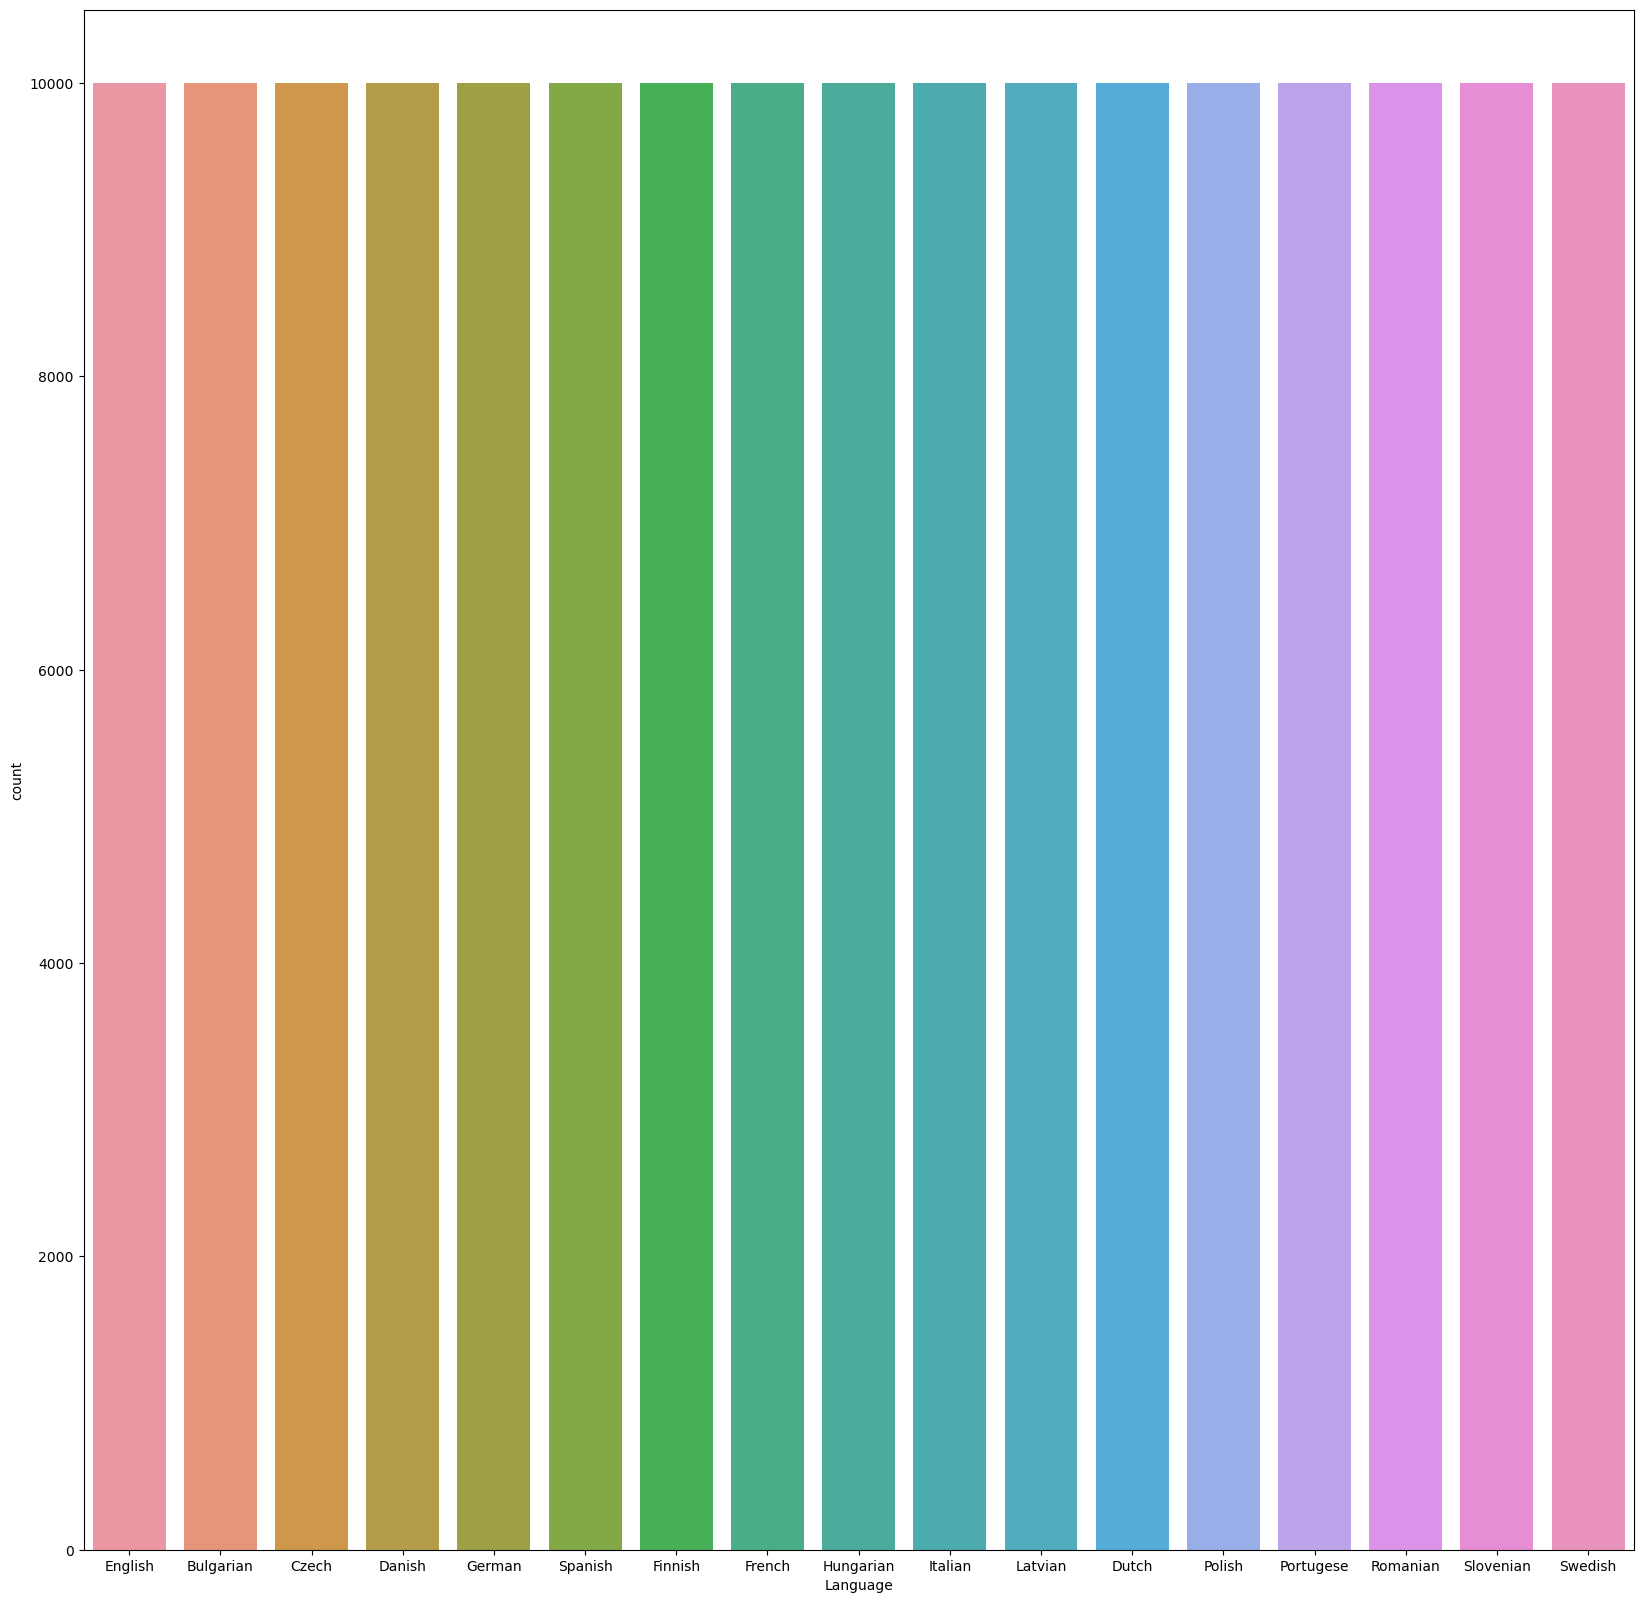

In [13]:
# Plot total count
plt.figure(figsize=(20,20))
sns.countplot(x=filtered_df['Language'],data=filtered_df)

# 6. Splitting the dataset

 * Splitting the dataset into independent and dependent variables

In [13]:
# Store the text in X and labels in y
X = filtered_df.iloc[:,0]
y = filtered_df.iloc[:,1]
print(X.shape, y.shape)

(170000,) (170000,)


In [15]:
X.head()

0                 membership of parliament see minutes
1    approval of minutes of previous sitting see mi...
2                 membership of parliament see minutes
3              verification of credentials see minutes
4                       documents received see minutes
Name: Text, dtype: object

In [16]:
y.head()

0    English
1    English
2    English
3    English
4    English
Name: Language, dtype: object

# 7. Split data into training and testing

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Feature Extraction using ngram TFIDF

* We use a char analyzer with n_gram range = (2,4), for going char by char. 
* And a word analyzer with n_gram range = (1,2) for going word by word.
* Combine both using feature unions.

In [15]:
char_vectorizer = TfidfVectorizer(analyzer='char',ngram_range=(2,4))
word_vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,2))
vectorizer = FeatureUnion([
    ('char_vectorizer', char_vectorizer),
    ('word_vectorizer', word_vectorizer)
], n_jobs=-1)

# 9. Get the vocabulary size (number of features) of each transformer

In [34]:
char_vocab_size = len(pipe_mnb.named_steps['vectorizer'].transformer_list[0][1].vocabulary_)
word_vocab_size = len(pipe_mnb.named_steps['vectorizer'].transformer_list[1][1].vocabulary_)

print("Character vocabulary size:", char_vocab_size)
print("Word vocabulary size:", word_vocab_size)

Character vocabulary size: 245205
Word vocabulary size: 1647904


# 10. Create a pipeline for Multinomial Naive Bayes 

In [16]:
pipe_mnb = Pipeline([
    ('vectorizer',vectorizer),
    ('clf', MultinomialNB())
])

In [17]:
with parallel_backend('loky', n_jobs=-1):
    pipe_mnb.fit(X_train,y_train)

In [33]:
predicted_mnb = pipe_mnb.predict(X_test)

python(10537) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [35]:
mnb_accuracy = (metrics.accuracy_score(y_test,predicted_mnb)) * 100
print("The Multinomial Naive Bayes has : ",mnb_accuracy,'% accuracy')

The Multinomial Naive Bayes has :  97.9764705882353 % accuracy


# 11. Classification Report for Multinomial Naive Bayes model

In [36]:
train_predict_mnb = pipe_mnb.predict(X_train)
train_report = metrics.classification_report( y_train,train_predict_mnb)

test_report = metrics.classification_report(predicted_mnb, y_test)

print("Classification Report for Training Data:\n", train_report)
print("\nClassification Report for Testing Data:\n", test_report)

Classification Report for Training Data:
               precision    recall  f1-score   support

   Bulgarian       1.00      0.93      0.96      8053
       Czech       1.00      0.97      0.98      8028
      Danish       1.00      1.00      1.00      7996
       Dutch       1.00      1.00      1.00      7986
     English       0.93      0.99      0.96      8050
     Finnish       1.00      1.00      1.00      8014
      French       0.95      1.00      0.97      7942
      German       0.95      1.00      0.97      7982
   Hungarian       1.00      0.97      0.98      8038
     Italian       0.94      1.00      0.97      8063
     Latvian       1.00      0.97      0.98      7967
      Polish       0.99      0.97      0.98      7985
   Portugese       1.00      1.00      1.00      8018
    Romanian       0.99      0.93      0.96      7942
   Slovenian       1.00      0.97      0.98      7962
     Spanish       0.96      1.00      0.98      7987
     Swedish       1.00      1.00      

# 12. Confusion matrix for MNB model

In [37]:
mnb_matrix = metrics.confusion_matrix(predicted_mnb,y_test)

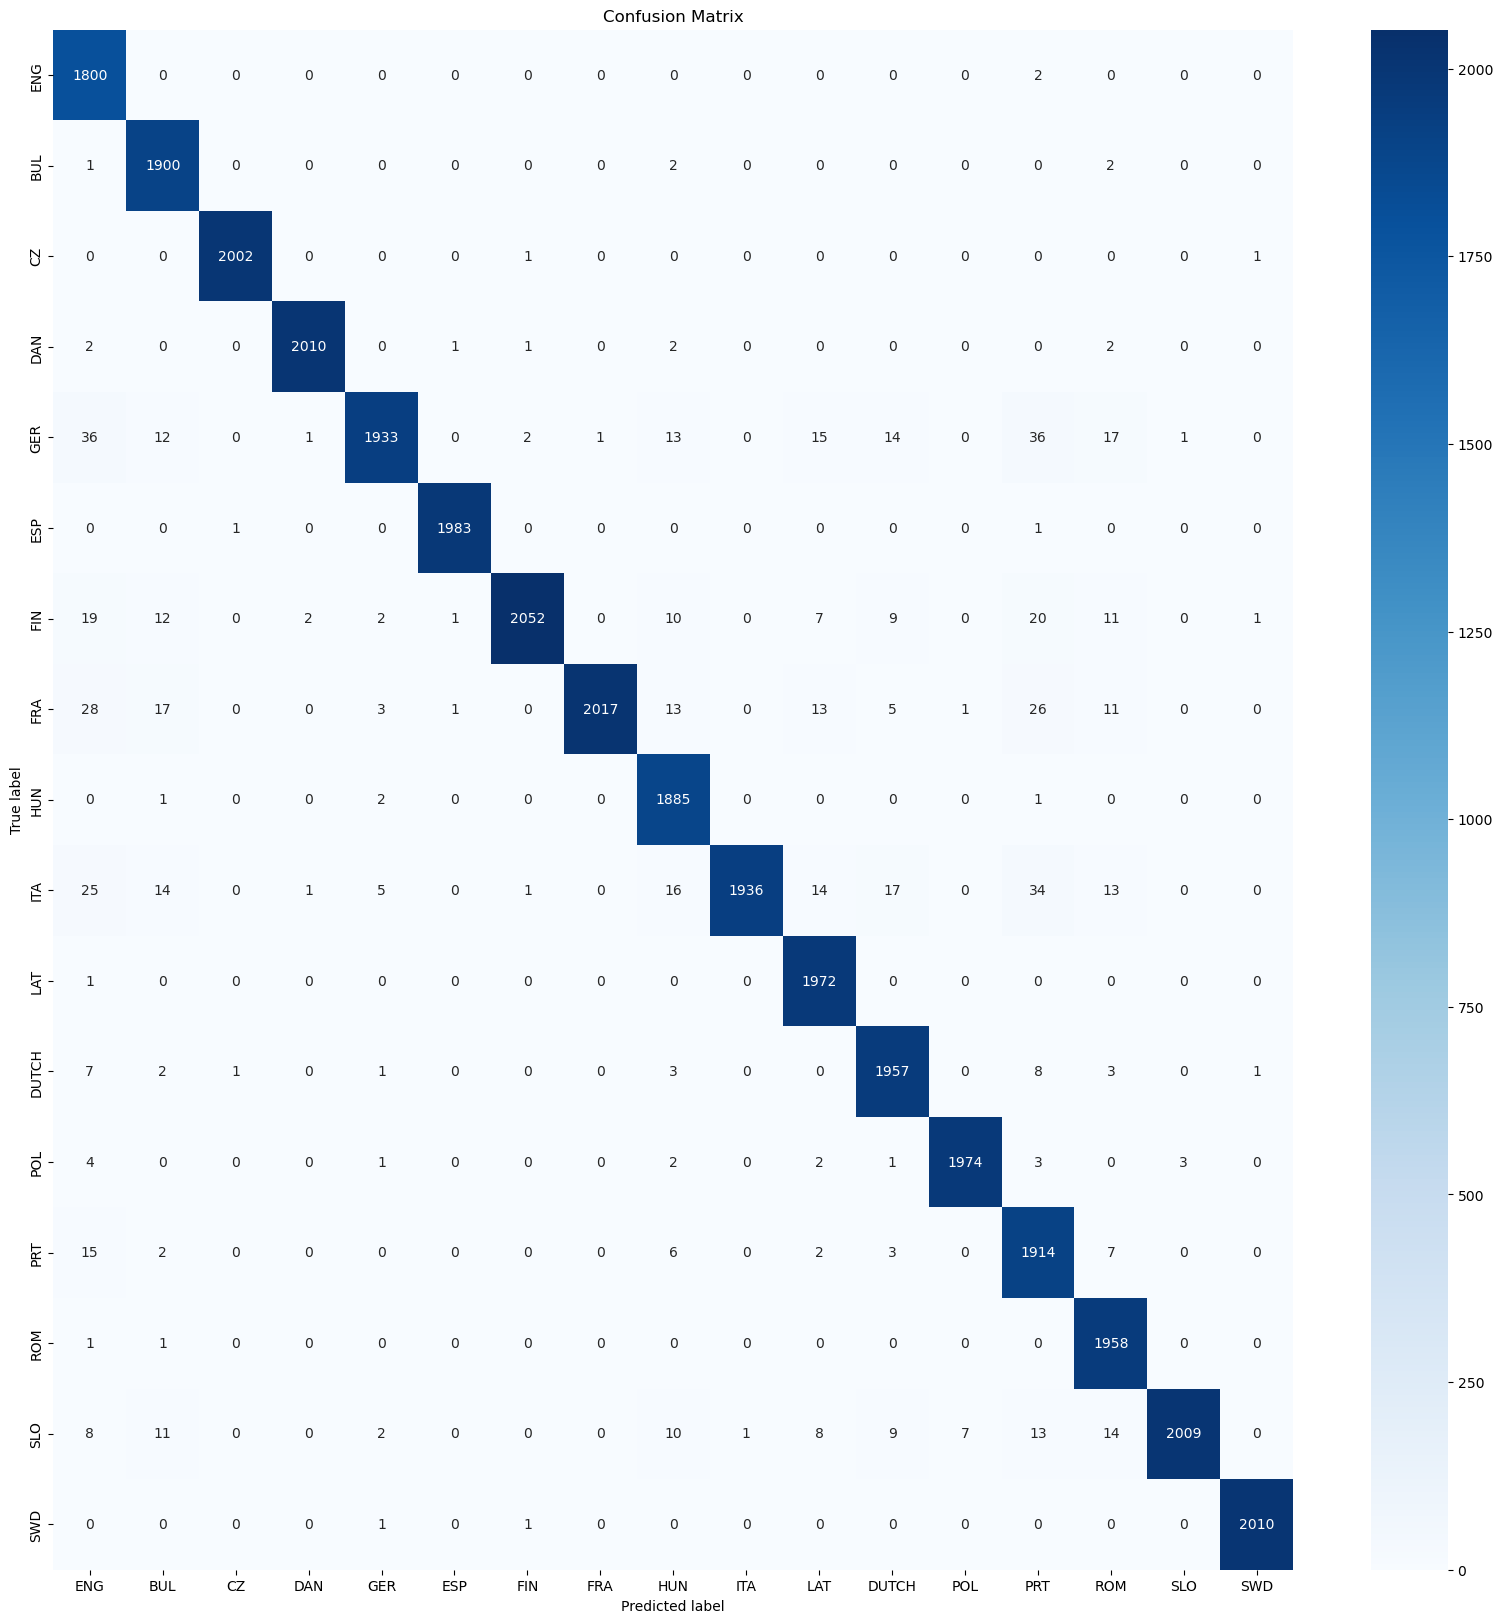

In [38]:
class_names = ['ENG', 'BUL', 'CZ', 'DAN', 'GER', 'ESP', 'FIN', 'FRA', 'HUN',
               'ITA', 'LAT', 'DUTCH', 'POL', 'PRT', 'ROM', 'SLO', 'SWD']
# Plot the confusion matrix using seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(mnb_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# 13. Create a pipeline for Logistic Regression model

* Instantiate a SVD to reduce the feature dimentionality for LR model.

In [24]:
svd = TruncatedSVD(n_components=100)
pipe_lr = Pipeline([
    ('vectorizer', vectorizer),
    ('svd', svd),
    ('clf', LogisticRegression(max_iter=1000))
])

In [25]:
with parallel_backend('loky', n_jobs=-1):
    pipe_lr.fit(X_train,y_train)

python(10250) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10317) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10318) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10319) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10320) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10321) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10322) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [26]:
predicted_lr = pipe_lr.predict(X_test)

In [27]:
lr_accuracy = (metrics.accuracy_score(y_test,predicted_lr)) * 100
print("The Logistic Regression has : ",lr_accuracy,'% accuracy')

The Logistic Regression has :  97.81176470588235 % accuracy


# 14. Classification Report for the Logistic Regression model

In [28]:
train_predict_lr = pipe_lr.predict(X_train)
train_report = metrics.classification_report(y_train, train_predict_lr)

test_report = metrics.classification_report(predicted_lr, y_test)

print("Classification Report for Training Data:\n", train_report)
print("\nClassification Report for Testing Data:\n", test_report)

Classification Report for Training Data:
               precision    recall  f1-score   support

   Bulgarian       0.91      0.95      0.93      8053
       Czech       0.99      0.97      0.98      8028
      Danish       1.00      0.99      0.99      7996
       Dutch       1.00      0.99      1.00      7986
     English       0.94      0.98      0.96      8050
     Finnish       1.00      1.00      1.00      8014
      French       0.98      0.99      0.99      7942
      German       0.99      1.00      0.99      7982
   Hungarian       0.99      0.97      0.98      8038
     Italian       0.99      0.99      0.99      8063
     Latvian       0.98      0.97      0.97      7967
      Polish       0.99      0.97      0.98      7985
   Portugese       0.99      1.00      0.99      8018
    Romanian       0.93      0.94      0.94      7942
   Slovenian       0.99      0.97      0.98      7962
     Spanish       0.99      0.99      0.99      7987
     Swedish       1.00      1.00      

# 15. Confusion matrix for LR model

In [31]:
lr_matrix = metrics.confusion_matrix(predicted_lr,y_test)

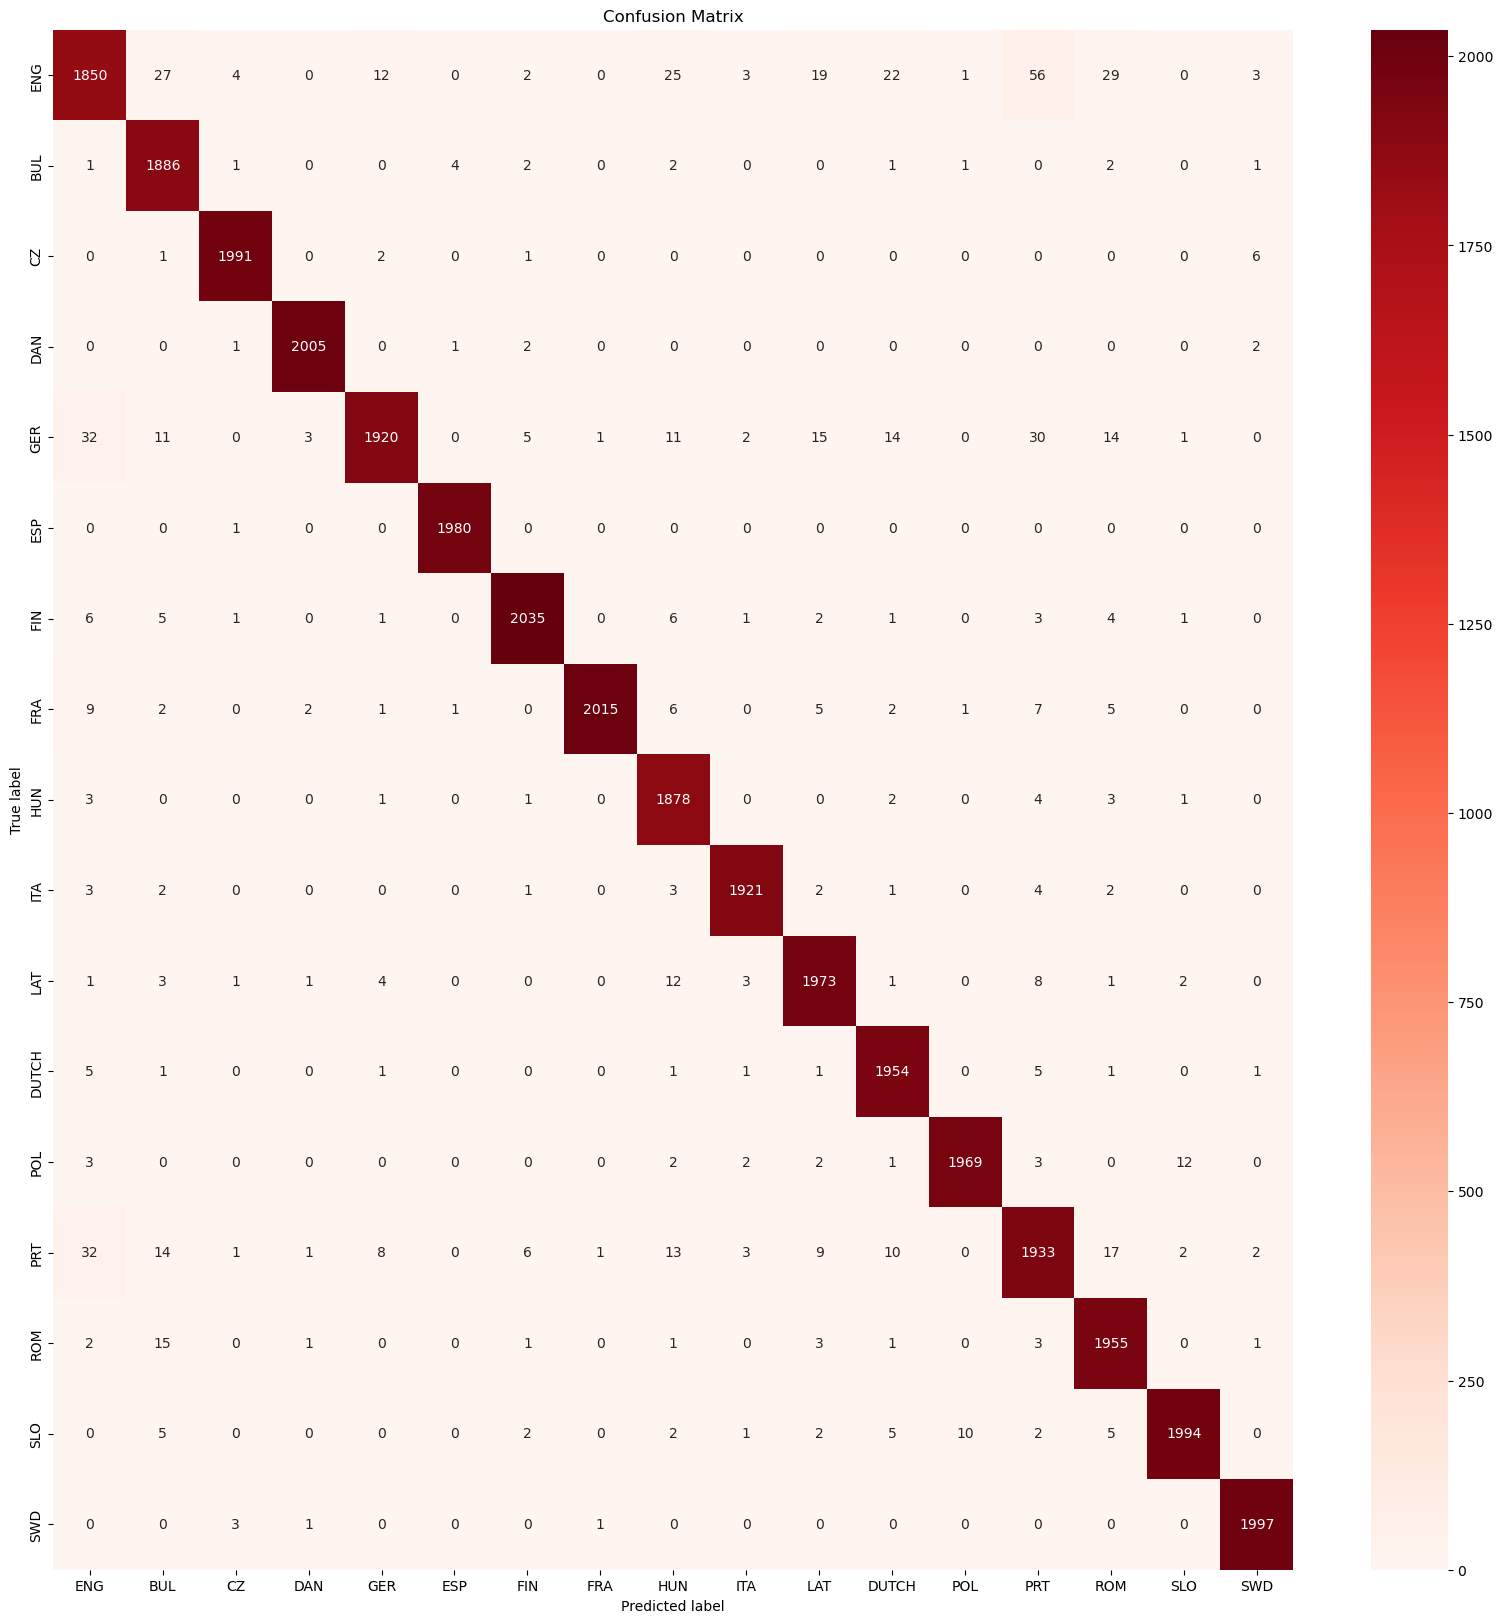

In [39]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(lr_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# 16. Testing MNB model on unseen data.

In [43]:
texts = [    "This is an example of English text.",    
         "Ceci est un exemple de texte en français.",    
         "Dies ist ein Beispiel für deutschen Text.",    
         "Este es un ejemplo de texto en español.",    
         "Това е пример за български текст.",        
         "Dit is een voorbeeld van Nederlandse tekst.",    
         "Questo è un esempio di testo italiano.",    
         "To jest przykład tekstu w języku polskim.",    
         "Tämä on esimerkki suomenkielisestä tekstistä.",    
         "Dette er et eksempel på dansk tekst.",    
         "Šis ir piemērs latviešu valodas tekstam.",    
         "Ez egy példa a magyar szövegre.",    
         "Tento text je příkladem českého textu.",    
         "Acesta este un exemplu de text în limba română.",    
         "To je primer slovenskega besedila."]

# Preprocess the texts (assuming you've defined preprocessing functions)
preprocessed_texts = [preprocess_text(text, translate_table) for text in texts]

# Predict the language of the vectorized texts using your trained model
predictions = pipe_mnb.predict(preprocessed_texts)

# Print the predicted languages
for text, language in zip(texts, predictions):
    print(f"Text: {text}\nPredicted Language: {language}\n")

Text: This is an example of English text.
Predicted Language: English

Text: Ceci est un exemple de texte en français.
Predicted Language: French

Text: Dies ist ein Beispiel für deutschen Text.
Predicted Language: German

Text: Este es un ejemplo de texto en español.
Predicted Language: Spanish

Text: Това е пример за български текст.
Predicted Language: Bulgarian

Text: Dit is een voorbeeld van Nederlandse tekst.
Predicted Language: Dutch

Text: Questo è un esempio di testo italiano.
Predicted Language: Italian

Text: To jest przykład tekstu w języku polskim.
Predicted Language: Polish

Text: Tämä on esimerkki suomenkielisestä tekstistä.
Predicted Language: Finnish

Text: Dette er et eksempel på dansk tekst.
Predicted Language: Danish

Text: Šis ir piemērs latviešu valodas tekstam.
Predicted Language: Latvian

Text: Ez egy példa a magyar szövegre.
Predicted Language: Hungarian

Text: Tento text je příkladem českého textu.
Predicted Language: Czech

Text: Acesta este un exemplu de tex

# 17. Testing LR model on unseen data

In [44]:
predictions = pipe_lr.predict(preprocessed_texts)

# Print the predicted languages
for text, language in zip(texts, predictions):
    print(f"Text: {text}\nPredicted Language: {language}\n")

Text: This is an example of English text.
Predicted Language: English

Text: Ceci est un exemple de texte en français.
Predicted Language: French

Text: Dies ist ein Beispiel für deutschen Text.
Predicted Language: German

Text: Este es un ejemplo de texto en español.
Predicted Language: Spanish

Text: Това е пример за български текст.
Predicted Language: Bulgarian

Text: Dit is een voorbeeld van Nederlandse tekst.
Predicted Language: Dutch

Text: Questo è un esempio di testo italiano.
Predicted Language: Italian

Text: To jest przykład tekstu w języku polskim.
Predicted Language: Polish

Text: Tämä on esimerkki suomenkielisestä tekstistä.
Predicted Language: Finnish

Text: Dette er et eksempel på dansk tekst.
Predicted Language: Danish

Text: Šis ir piemērs latviešu valodas tekstam.
Predicted Language: Latvian

Text: Ez egy példa a magyar szövegre.
Predicted Language: Hungarian

Text: Tento text je příkladem českého textu.
Predicted Language: Czech

Text: Acesta este un exemplu de tex

In [47]:
import pickle
mnb_model_filename = 'mnb_model.pckl'

with open(mnb_model_filename, 'wb') as file:
    pickle.dump(pipe_mnb, file)

print(f"Multinomial Naive Bayes model saved to {mnb_model_filename}")

Multinomial Naive Bayes model saved to mnb_model.pckl


In [49]:
model_filename = 'lr_model.pckl'

with open(model_filename, 'wb') as file:
    pickle.dump(pipe_lr, file)

print(f"Logistic Regression model saved to {model_filename}")

Logistic Regression model saved to lr_model.pckl
